<a href="https://colab.research.google.com/github/joy-ald/MLProjects/blob/main/KaggleBank01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [635]:
# PREDICT TERM DEPOSIT YES OR NO

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("/content/drive/MyDrive/bank.csv")
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [636]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [637]:
data.shape

(11162, 17)

In [638]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [639]:
for col in data.select_dtypes(include='object').columns:
    print(col)
    print(data[col].unique())

job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital
['married' 'single' 'divorced']
education
['secondary' 'tertiary' 'primary' 'unknown']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'other' 'failure' 'success']
deposit
['yes' 'no']


**Exploratory Data Analysis**


1.Find Missing Values

2.Find Features with one value

3.Explore the Categorical Features

4. Find Categorical Feature Distribution

5. Relationship between Categorical Features and Label

6. Explore the Numerical Features

7.Find Discrete Numerical Features

8.Relation between Discrete numerical Features and Labels

9.Find Continous Numerical Features

10.Distribution of Continous Numerical Features

11.Relation between Continous numerical Features and Labels

12.Find Outliers in numerical features

13.Explore the Correlation between numerical features

14.Find Pair Plot

15.Check the Data set is balanced or not based on target values in

16.classification

In [640]:
# find missing values
# check if sum of isnull for each column, that is (  data[features] ) is greater than zero or not
features_na = [features for features in data.columns if data[features].isnull().sum() > 0]

for feature in features_na:
    print(feature, np.round(data[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

No missing value found


In [641]:
# Find number of unique values in each columns
# nunique returns the number of unique elements in the object

for column in data.columns:
    print(column,data[column].nunique())

age 76
job 12
marital 3
education 4
default 2
balance 3805
housing 2
loan 2
contact 3
day 31
month 12
duration 1428
campaign 36
pdays 472
previous 34
poutcome 4
deposit 2


There is no column with only one unique value

In [642]:
categorical_features=[feature for feature in data.columns if ((data[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

# FIND CATEGORICAL FEATURES DISTRIBUTION

In [643]:

for feature in categorical_features:
    print('The feature {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature job and number of categories are 12
The feature marital and number of categories are 3
The feature education and number of categories are 4
The feature default and number of categories are 2
The feature housing and number of categories are 2
The feature loan and number of categories are 2
The feature contact and number of categories are 3
The feature month and number of categories are 12
The feature poutcome and number of categories are 4


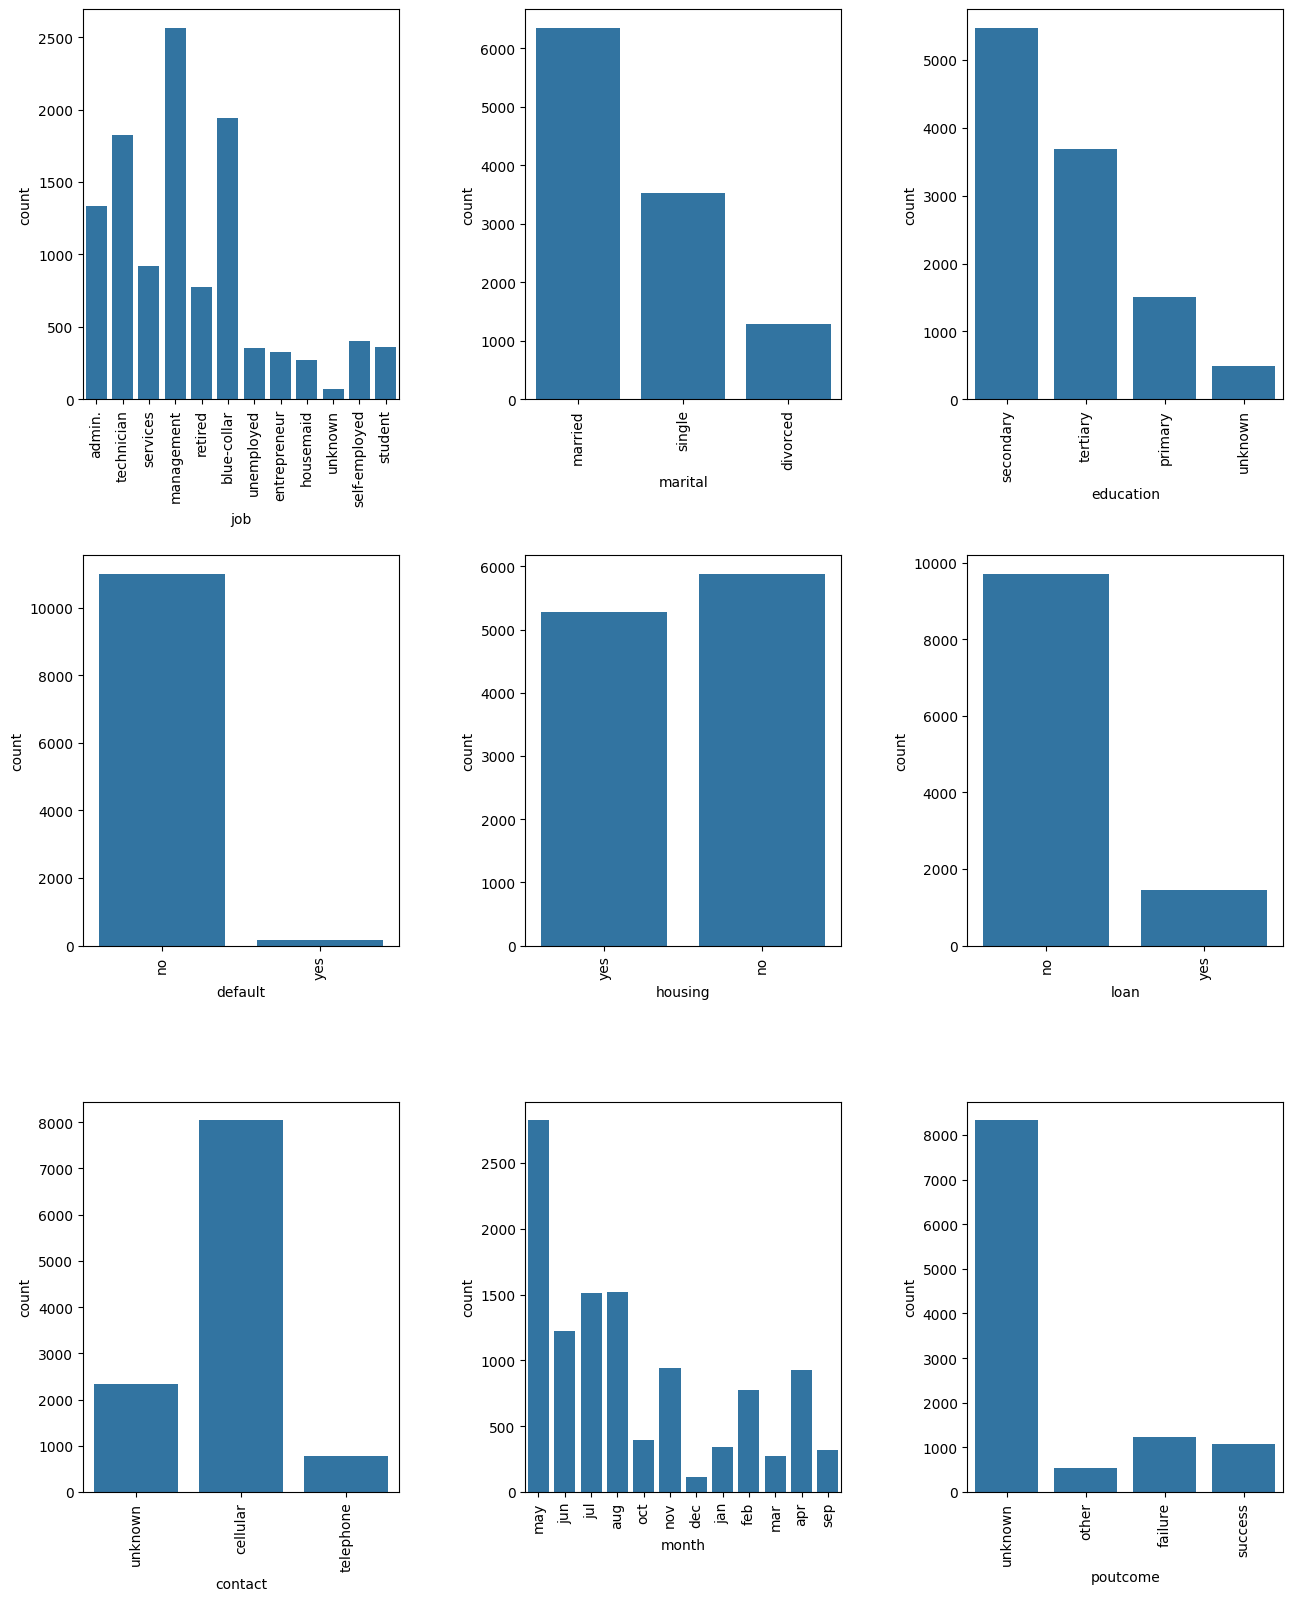

In [644]:
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')

plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
    sns.countplot(x=categorical_feature,data=data)
    labels=categorical_feature
    x=list(range(1,len(categorical_feature)))
    plt.xlabel(categorical_feature)
    plt.xticks(rotation = 90)
    plotnumber+=1

plt.show()

Job type predominantly is management, blue-collar, technician and admin.

Married is more than unmarried

No defaults is much higher than default yes.

Most data falls into month of May, followed by July,August, June, november and april. Likely that campaigns were active during then. Maybe customers are more interested in deposit during that interval, which resulted in active calls.

# WHICH (SUB)CATEGORY WAS MORE LIKELY TO INITIATE DEPOSIT

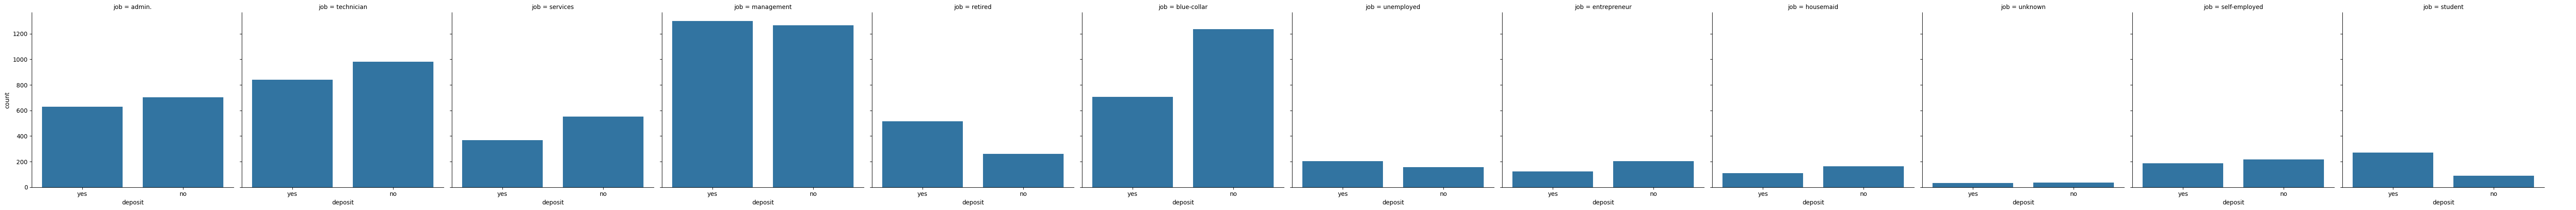

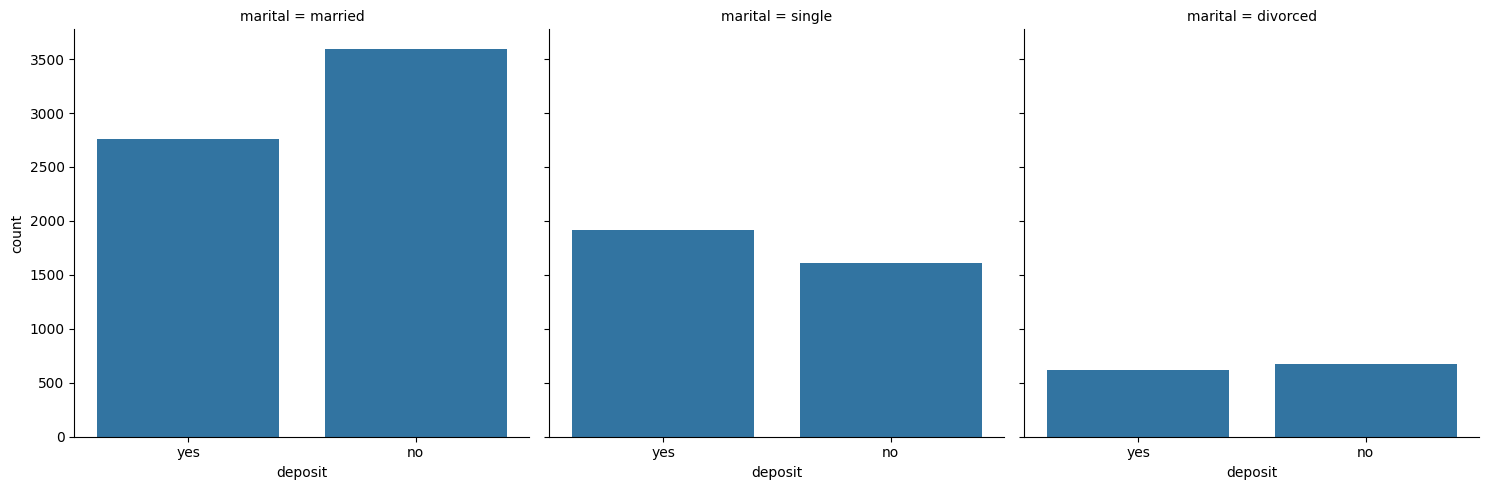

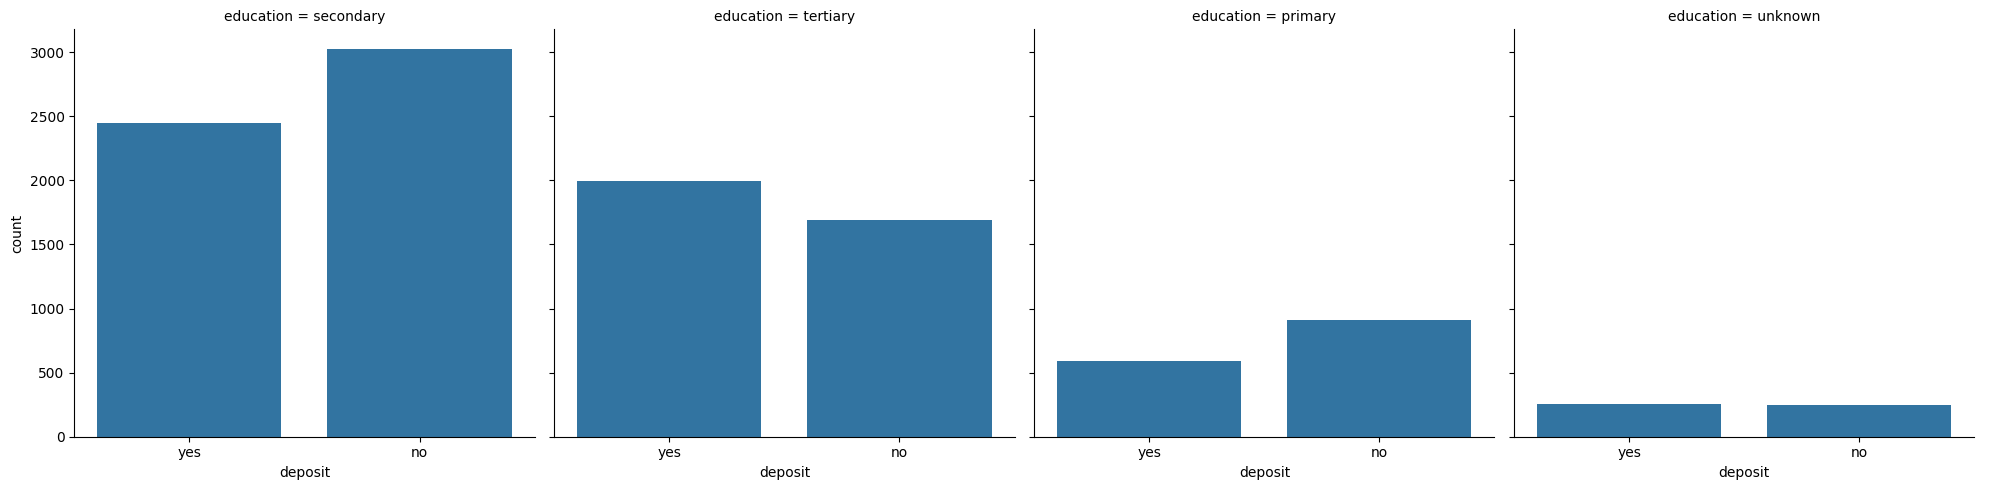

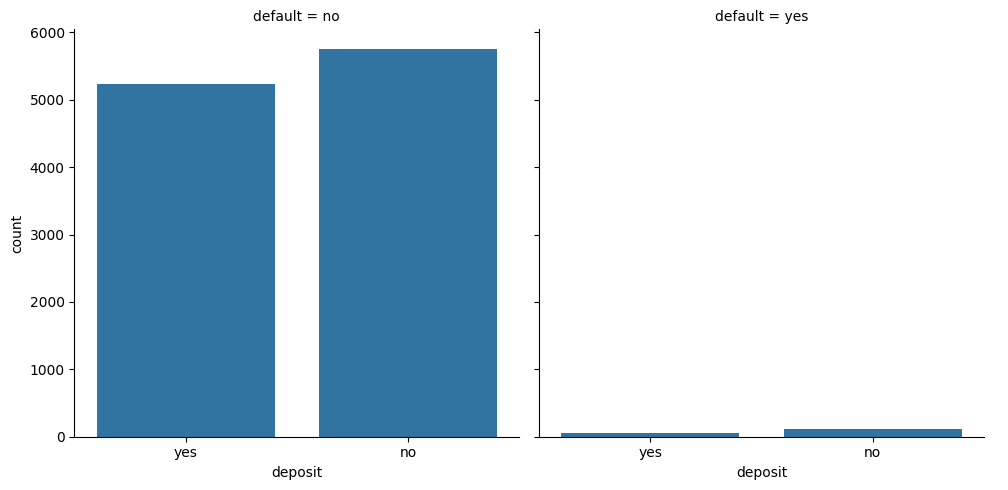

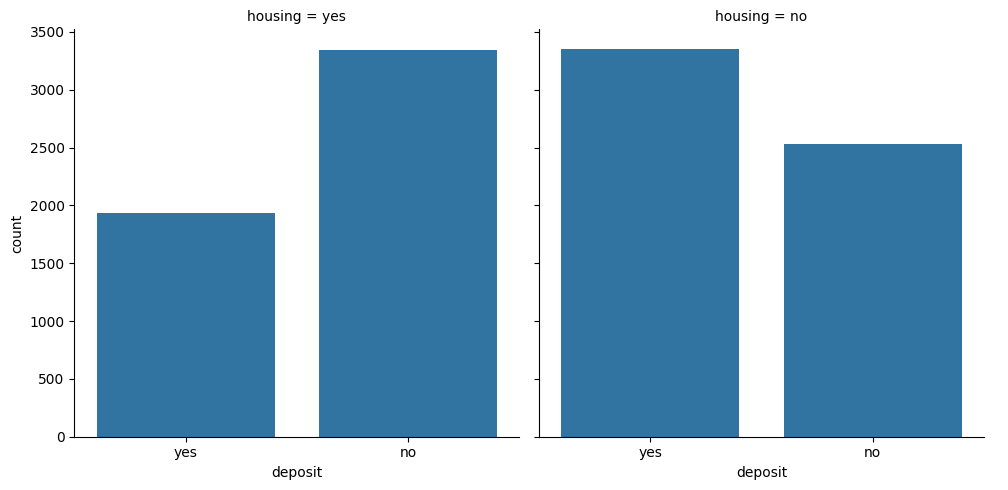

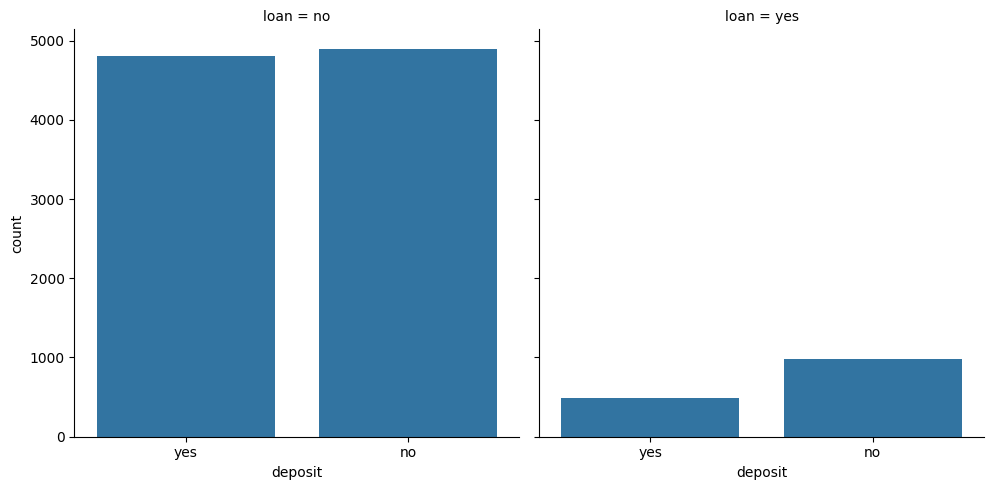

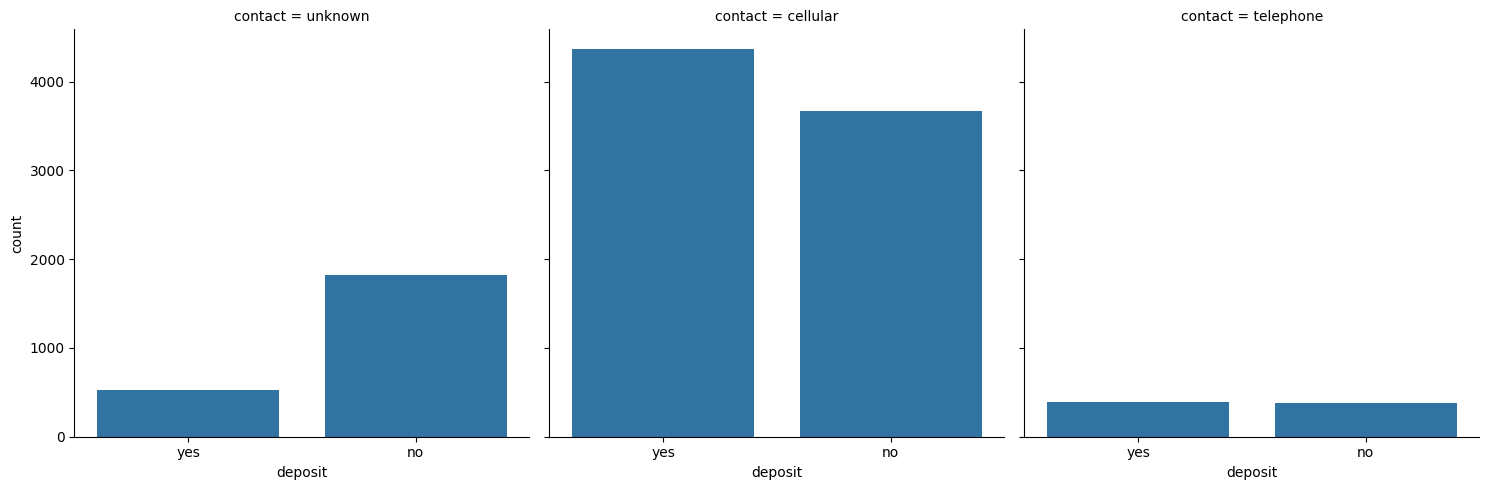

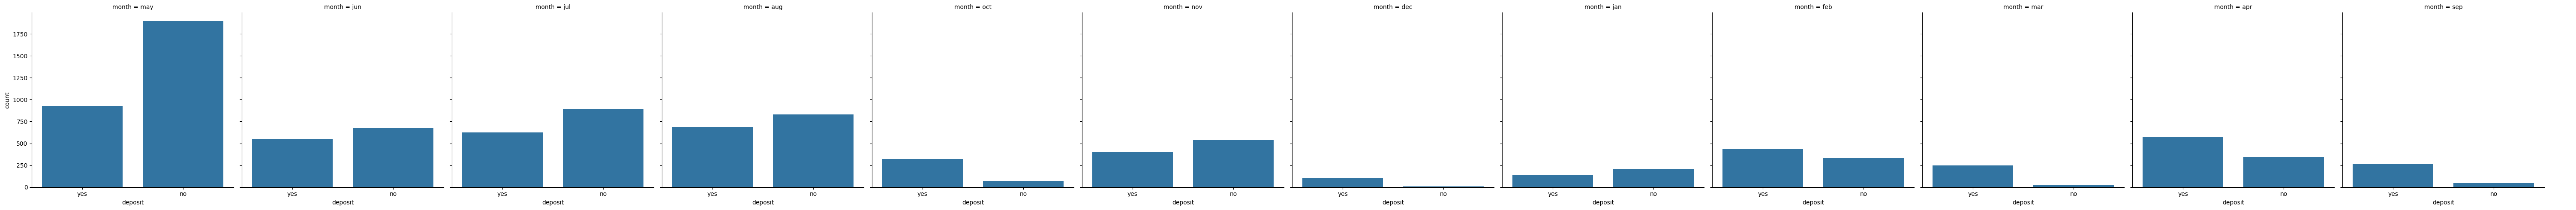

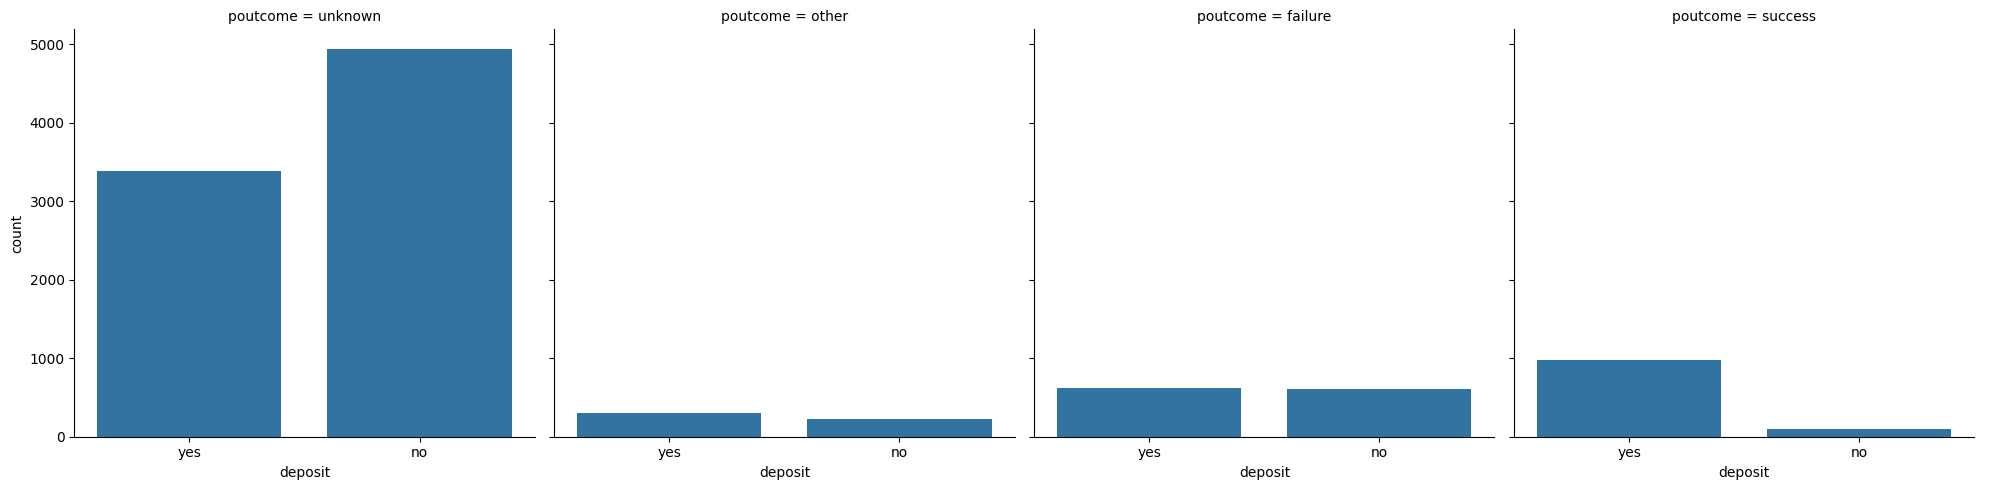

In [645]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable
for categorical_feature in categorical_features:
    sns.catplot(x='deposit', col=categorical_feature, kind='count', data= data)
plt.show()

#sns.catplot(x='deposit', col='marital', kind='count', data= data)

Married category is slightly biased towards NO

Job has 12 categories and only one category, blue-collar shows bias towards NO deposit

Secondary and primary education is biased towards NO

Contact=Telephone does not show any bias

Loan = NO, does not influence on the deposit decision

Poutcome = Unknown, has a bias for NO deposit

Month of May, lot of clients were contacted, but ratio is almost 2 (NO):1 (YES)




In [646]:
# list of numerical variables
numerical_features = [feature for feature in data.columns if ((data[feature].dtypes != 'O') & (feature not in ['deposit']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
#data[numerical_features].head()
data.head()

Number of numerical variables:  7


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


# **DISTRIBUTION OF CONTINUOUS VARIABLES**

Discrete Variables Count: 0
Continuous feature Count 7


<ipython-input-647-467c3cd14366>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[continuous_feature])
<ipython-input-647-467c3cd14366>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[continuous_feature])
<ipython-input-647-467c3cd14366>:13: UserWarning: 

`distplot` is a deprecated

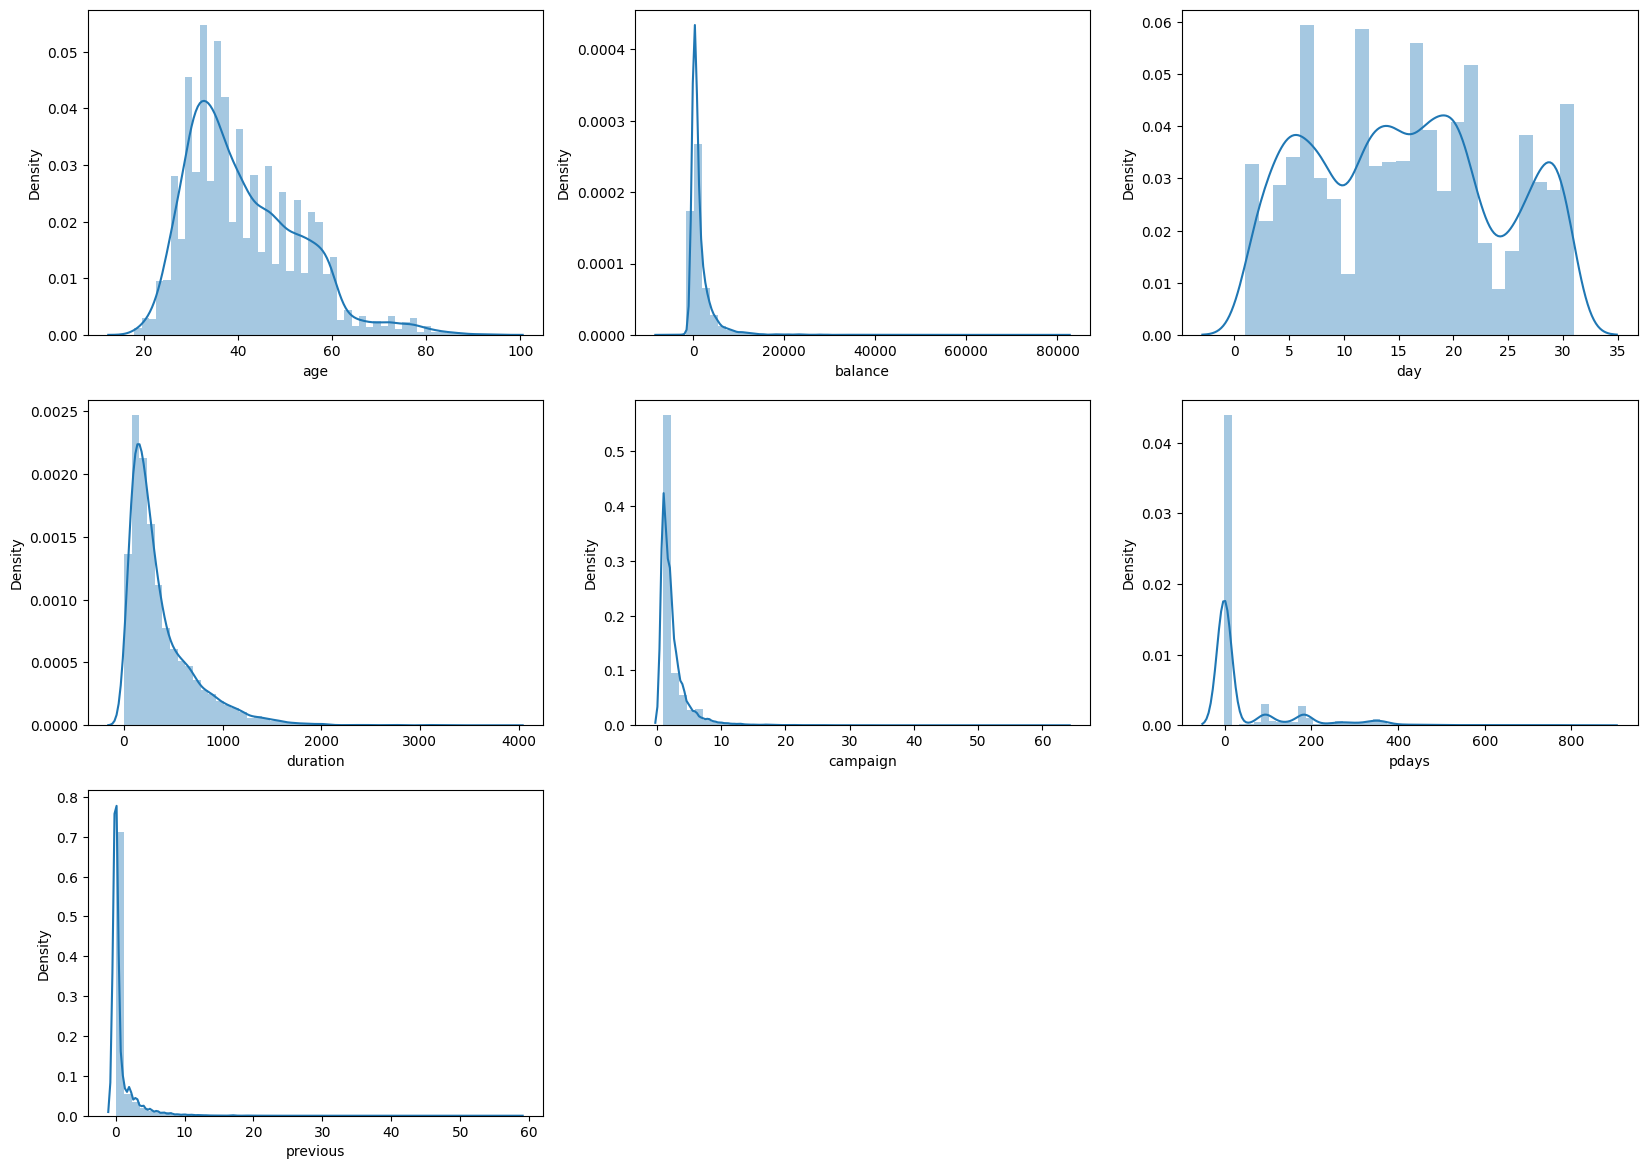

In [647]:
discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))


continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['deposit']]
print("Continuous feature Count {}".format(len(continuous_features)))

#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(data[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

In [648]:
## Checking for correlation
data.head()
data1 = data#cor_mat=continuous_features.corr()
#fig = plt.figure(figsize=(15,7))
#sns.heatmap(cor_mat,annot=True)



In [649]:
data1['age'].min()

18

In [650]:
data1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [651]:

data1=data

#for deposit column, replace yes with 1 and no with 0
data1['deposit_numeric']=data1['deposit'].map({'yes':1,'no':0})

# use log(10000 + balance) as new column
data1['balance_log']=np.log(data1['balance']+10000)
data1['duration_log']=np.log(data1['duration'])
data1['age_log']=np.log(data1['age'])


# drop deposit column
data1.drop('deposit',axis=1,inplace=True)


# add column for month_may =1 and rest of months = 0
data1['month_impact']=data1['month'].apply(lambda x : [1,2,3] if x == ['mar','sep','oct'] else 0)
data1['age_cat']=data1['age'].apply(lambda x : 1 if x < 45 else 0 )


# drop columns job, marital, education
#data1.drop(['education','month'],axis=1,inplace=True)


# one hot encoding for contact, poutcome, default
data2 = pd.get_dummies(data1, columns=['contact','job','poutcome','default','housing','loan','marital','education','month'])
data2['loan_attraction'] = data2['loan_yes'] + data2['default_yes']+data2['loan_no'] + data2['default_no']
#data2['housing_attraction'] = data2['housing_yes'] + data2['default_yes


# drop outliers from balance_log,age and duration
data2 = data2[np.abs(data2['balance_log']-data2['balance_log'].mean())<=(4*data2['balance_log'].std())]
data2 = data2[np.abs(data2['duration']-data2['duration'].mean())<=(4*data2['duration'].std())]
data2 = data2[np.abs(data2['age']-data2['age'].mean())<=(4*data2['age'].std())]
data2 = data2[np.abs(data2['duration_log']-data2['duration_log'].mean())<=(5*data2['duration_log'].std())]

from sklearn.preprocessing import normalize
#normalize balance_log, duration and age
data2[['balance','duration','age']] = normalize(data2[['balance','duration','age']])

#introduce a likeness_score after normlization with added weightage
data2['self_score'] = data1['balance_log'] + 2*data1['duration_log'] + data1['age_log']

#data2['caller_score'] = data1['balance_log'] + data1['duration_log'] + data1['age_log']


data2.head()

,age,balance,day,duration,campaign,pdays,previous,deposit_numeric,balance_log,duration_log,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,loan_attraction,self_score
0,0.023003,0.913473,5,0.406248,1,-1,0,1,9.420844,6.948897,...,False,False,False,False,True,False,False,False,True,27.396176
1,0.038127,0.030638,5,0.998803,1,-1,0,1,9.214830,7.290975,...,False,False,False,False,True,False,False,False,True,27.822132
2,0.021779,0.674626,5,0.737839,1,-1,0,1,9.329900,7.236339,...,False,False,False,False,True,False,False,False,True,27.516150
3,0.021625,0.973503,5,0.227649,1,-1,0,1,9.431562,6.361302,...,False,False,False,False,True,False,False,False,True,26.161500
4,0.077166,0.262937,5,0.961722,2,-1,0,1,9.228573,6.511745,...,False,False,False,False,True,False,False,False,True,26.241048


In [652]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10984 entries, 0 to 11161
Data columns (total 59 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10984 non-null  float64
 1   balance              10984 non-null  float64
 2   day                  10984 non-null  int64  
 3   duration             10984 non-null  float64
 4   campaign             10984 non-null  int64  
 5   pdays                10984 non-null  int64  
 6   previous             10984 non-null  int64  
 7   deposit_numeric      10984 non-null  int64  
 8   balance_log          10984 non-null  float64
 9   duration_log         10984 non-null  float64
 10  age_log              10984 non-null  float64
 11  month_impact         10984 non-null  int64  
 12  age_cat              10984 non-null  int64  
 13  contact_cellular     10984 non-null  bool   
 14  contact_telephone    10984 non-null  bool   
 15  contact_unknown      10984 non-null  bool

MODEL SELECTION

In [653]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
X = data2.drop(['deposit_numeric'],axis=1)

y = data2['deposit_numeric']

print(X)

            age   balance  day  duration  campaign  pdays  previous  \
0      0.023003  0.913473    5  0.406248         1     -1         0   
1      0.038127  0.030638    5  0.998803         1     -1         0   
2      0.021779  0.674626    5  0.737839         1     -1         0   
3      0.021625  0.973503    5  0.227649         1     -1         0   
4      0.077166  0.262937    5  0.961722         2     -1         0   
...         ...       ...  ...       ...       ...    ...       ...   
11157  0.127358  0.003859   20  0.991849         1     -1         0   
11158  0.052794  0.992264   16  0.112357         4     -1         0   
11159  0.197693  0.179159   19  0.963753         2     -1         0   
11160  0.978791  0.000000    8  0.204863         2    172         5   
11161  0.054061  0.000000    9  0.998538         1     -1         0   

       balance_log  duration_log   age_log  ...  month_jan  month_jul  \
0         9.420844      6.948897  4.077537  ...      False      False   
1

In [654]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

model_score1 =cross_val_score(estimator=RandomForestClassifier(),X=X_train, y=y_train, cv=10)
print(model_score1)
print(model_score1.mean())

[0.8407281  0.85437998 0.84641638 0.85437998 0.83617747 0.8225256
 0.86348123 0.83257403 0.86218679 0.86332574]
0.8476175297565829


In [655]:
from sklearn.model_selection import cross_val_score
model_score4 =cross_val_score(estimator=XGBClassifier(),X=X_train, y=y_train, cv=10)
print(model_score4)
print(model_score4.mean())

[0.86234357 0.85551763 0.8486917  0.8668942  0.85665529 0.84186576
 0.87372014 0.85193622 0.86218679 0.87357631]
0.8593387598767495


In [656]:
data2.head()



,age,balance,day,duration,campaign,pdays,previous,deposit_numeric,balance_log,duration_log,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,loan_attraction,self_score
0,0.023003,0.913473,5,0.406248,1,-1,0,1,9.420844,6.948897,...,False,False,False,False,True,False,False,False,True,27.396176
1,0.038127,0.030638,5,0.998803,1,-1,0,1,9.214830,7.290975,...,False,False,False,False,True,False,False,False,True,27.822132
2,0.021779,0.674626,5,0.737839,1,-1,0,1,9.329900,7.236339,...,False,False,False,False,True,False,False,False,True,27.516150
3,0.021625,0.973503,5,0.227649,1,-1,0,1,9.431562,6.361302,...,False,False,False,False,True,False,False,False,True,26.161500
4,0.077166,0.262937,5,0.961722,2,-1,0,1,9.228573,6.511745,...,False,False,False,False,True,False,False,False,True,26.241048
